In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [150]:
df=df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [151]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [152]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


# FeatureS Separation

In [153]:
X = df.drop('FWI',axis=1) #INDEPENDENT
y = df['FWI'] # TARGET

In [154]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


# SPLITTING TRAINA AND TEST DATASET

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [156]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

## FEATURE SELECTION

#### BASED ON CORRELATION
- HIGHLY POSITIVE CORRELATED FEATURE MUST BE REMOVED

<Axes: >

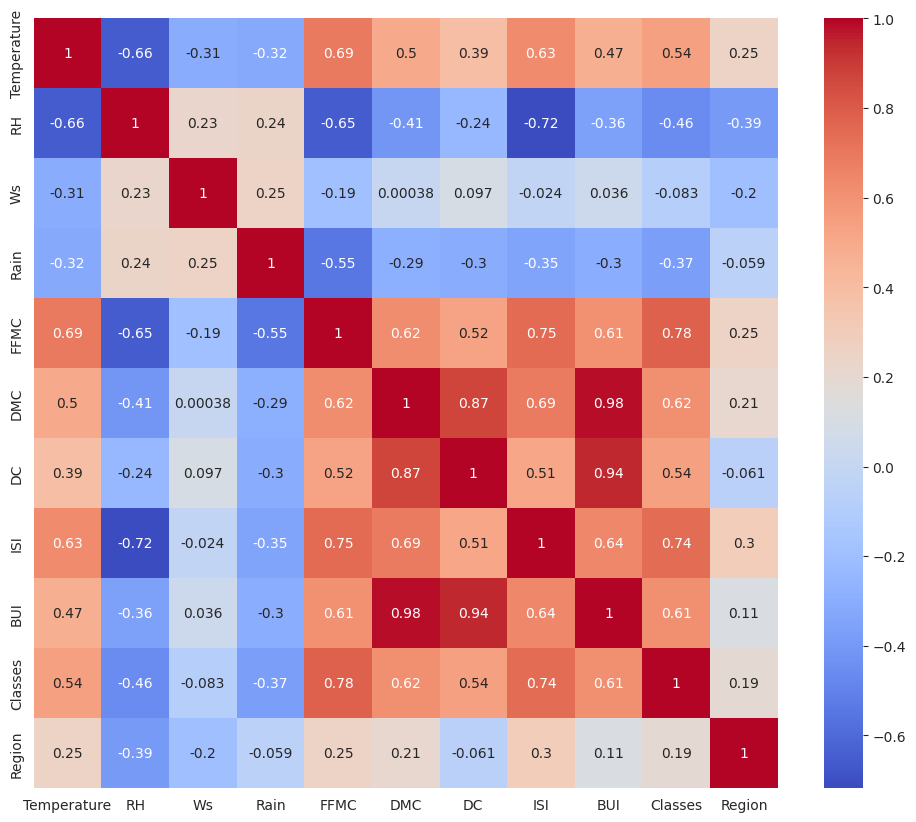

In [157]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')

In [158]:
def drop_high_correlated_features(data, threshold):
   col_corr = set() #a set used to store the names of features that are highly correlated.
   corr_matrix = data.corr() #correlation matrix
   for i in range(len(corr_matrix.columns)): # Iterate over rows
       for j in range(i): # Iterate only over columns before the row value (lower triangle)
           if abs(corr_matrix.iloc[i, j]) > threshold:
               colname = corr_matrix.columns[i]
               col_corr.add(colname)
   return col_corr

In [159]:
drop_high_correlated_features(X_train,0.85)

{'BUI', 'DC'}

In [160]:
X_train.drop(['BUI', 'DC'],axis=1,inplace=True)
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0.0
141,31,72,14,0.2,60.2,3.8,0.8,0,1.0
192,40,31,15,0.0,94.2,22.5,16.6,1,1.0
68,32,60,18,0.3,77.1,11.3,2.2,0,0.0
119,32,47,14,0.7,77.5,7.1,1.8,0,0.0


In [161]:
X_test.drop(['BUI', 'DC'],axis=1,inplace=True)
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0.0
6,33,54,13,0.0,88.2,9.9,6.4,1,0.0
152,28,58,18,2.2,63.7,3.2,1.2,0,1.0
232,34,58,13,0.2,79.5,18.7,2.1,0,1.0
238,30,65,14,0.0,85.4,16.0,4.5,1,1.0


In [162]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

# FEATURE SCALLING

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

### Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'After Scaling')

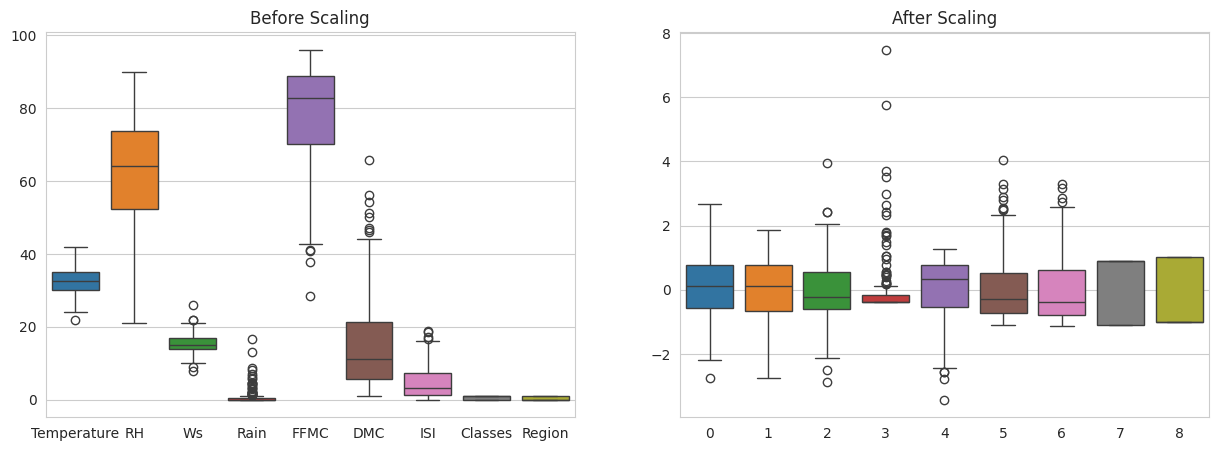

In [164]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.boxplot( data=X_train_scale)
plt.title('After Scaling')

# LINEAR REGRESSION MODEL

Mean absolute error is : 0.55
R^2 error is : 0.98

It follow the linear relation, it is good model


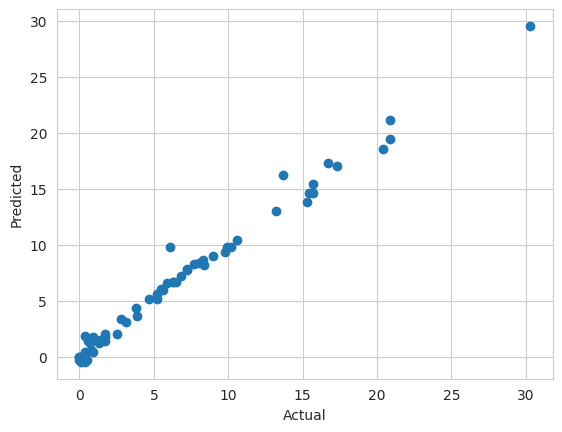

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

#intilazing the linear regression model
lin_reg = LinearRegression()

# fitting train dataset into the model
lin_reg.fit(X_train_scale,y_train)

#predicting the value on scalled test set
y_pred = lin_reg.predict(X_test_scale)

# calculating the mse
mae = mean_absolute_error(y_test,y_pred)

# calculating the r2 score
r2 = r2_score(y_test,y_pred)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

#intilazing the linear regression model
lin_reg = LinearRegression()

# fitting train dataset into the model
lin_reg.fit(X_train_scale,y_train)

#predicting the value on scalled test set
y_pred = lin_reg.predict(X_test_scale)

# calculating the mse
mae = mean_absolute_error(y_test,y_pred)

# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('Mean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
print('\nIt follow the linear relation, it is good model')

# Ridge REGRESSION MODEL
- Ridge regression, also known as Tikhonov regularization, is a method used in linear regression to address the issue of multicollinearity and overfitting by adding a penalty term to the loss function. This technique is particularly useful when there are highly correlated predictor variables or when the number of predictors exceeds the number of data points.
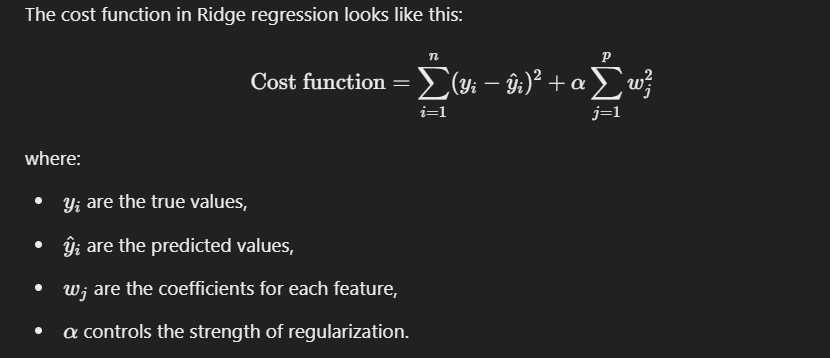


Mean absolute error is : 0.56
R^2 error is : 0.98

Coefficients: [-0.02692577 -0.20519212  0.02554428 -0.04069202 -0.78583006  3.68286744
  4.74488835  0.43423672 -0.38466214]


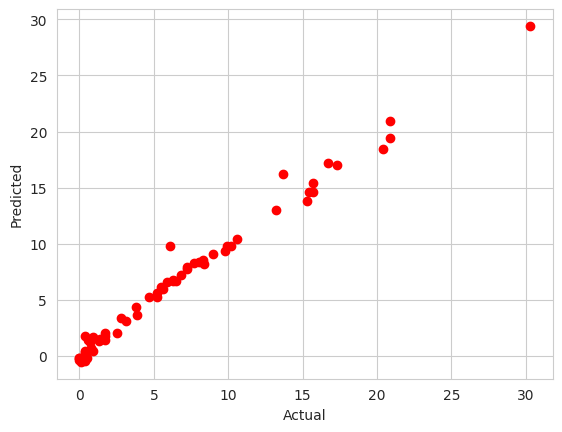

In [166]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

#intilazing the ridge regression model
ridge = Ridge()

# fitting train dataset into the model
ridge.fit(X_train_scale,y_train)

#predicting the value on scalled test set
y_pred = ridge.predict(X_test_scale)

# calculating the mse
mae = mean_absolute_error(y_test,y_pred)

# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('Mean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

# visualizing the prediction
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print("\nCoefficients:", ridge.coef_)

## RidgeCV
- The RidgeCV class in sklearn.linear_model is an implementation of Ridge Regression with cross-validation for automatically selecting the best regularization parameter α


alphas looking for optimal one : (0.1, 1.0, 10.0)

Optimal alpha: 1.0

Coefficients: [-0.02692577 -0.20519212  0.02554428 -0.04069202 -0.78583006  3.68286744
  4.74488835  0.43423672 -0.38466214]

Mean absolute error is : 0.56
R^2 error is : 0.98


Text(0, 0.5, 'Predicted')

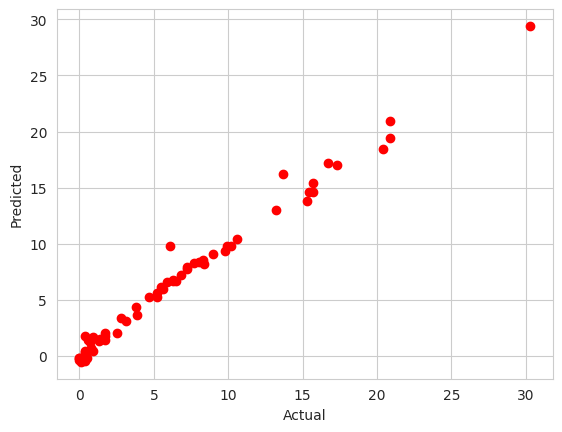

In [167]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score

ridge_cv = RidgeCV(cv=5)

ridge_cv.fit(X_train_scale,y_train)

y_pred = ridge_cv.predict(X_test_scale)

# Display the best alpha found by cross-validation
print("\nalphas looking for optimal one :", ridge_cv.alphas)
print("\nOptimal alpha:", ridge_cv.alpha_)
# Get the coefficients of the model with the best alpha
print("\nCoefficients:", ridge_cv.coef_)


# calculating the mse
mae = mean_absolute_error(y_test,y_pred)
# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('\nMean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [168]:
# parameter used in RidgeCV
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Lasso regression
- Lasso regression, short for Least Absolute Shrinkage and Selection Operator(LASSO), is a type of linear regression that adds a penalty to the regression model to prevent overfitting and perform feature selection. It achieves this by shrinking some regression coefficients to exactly zero, effectively removing less important predictors from the model.
- cost = (1 / (2 * n_samples)) * ||y - Xw||^2 + alpha * ||w||
- y - actual value
- Xw - predicted value
- w is slope/coefficient


Mean absolute error is : 1.13
R^2 error is : 0.95

Coefficients: [ 0.         -0.          0.         -0.          0.          2.99025157
  4.00824747  0.         -0.        ]


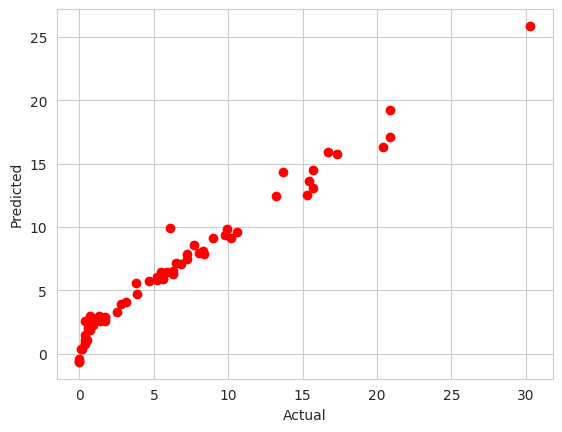

In [169]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

#intilazing the lasso regression model
lasso = Lasso()

# fitting train dataset into the model
lasso.fit(X_train_scale,y_train)

#predicting the value on scalled test set
y_pred = lasso.predict(X_test_scale)

# calculating the mse
mae = mean_absolute_error(y_test,y_pred)

# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('Mean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

# visualizing the prediction
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print("\nCoefficients:", lasso.coef_)

## LASSOCV
- The LassoCV class in sklearn.linear_model is an implementation of Lasso regression with cross-validation for selecting the optimal regularization parameter,α.


alphas looking for optimal one : [7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.02155573
 0.02010295 0.01874808 0.0174

Text(0, 0.5, 'Predicted')

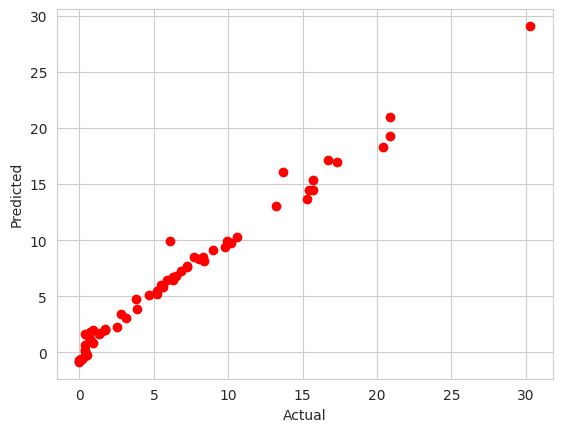

In [170]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

lasso_cv = LassoCV(cv=5,random_state=42)

lasso_cv.fit(X_train_scale,y_train)

y_pred = lasso_cv.predict(X_test_scale)

# Display the best alpha found by cross-validation
print("\nalphas looking for optimal one :", lasso_cv.alphas_)
print("\nOptimal alpha:", lasso_cv.alpha_)
# Get the coefficients of the model with the best alpha
print("\nCoefficients:", lasso_cv.coef_)


# calculating the mse
mae = mean_absolute_error(y_test,y_pred)
# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('\nMean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [171]:
# parameter used in LassoCV
lasso_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

# ELASTICNET REGRESSION MODEL

- Elastic Net is a regularization technique that combines the strengths of Ridge Regression (which uses L2-norm regularization) and Lasso Regression (which uses L1​-norm regularization). It is particularly useful when there are many correlated predictors or when the number of predictors is greater than the number of observations.
- cost = 1 / (2 * n_samples) * ||y - Xw||^2 + alpha * l1_ratio * ||w|| + 0.5 * alpha * (1 - l1_ratio) * ||w||^2



Mean absolute error is : 1.88
R^2 error is : 0.88

Coefficients: [ 0.21700498 -0.46785751  0.         -0.          0.37217213  2.36758116
  2.35779601  0.87026661  0.        ]


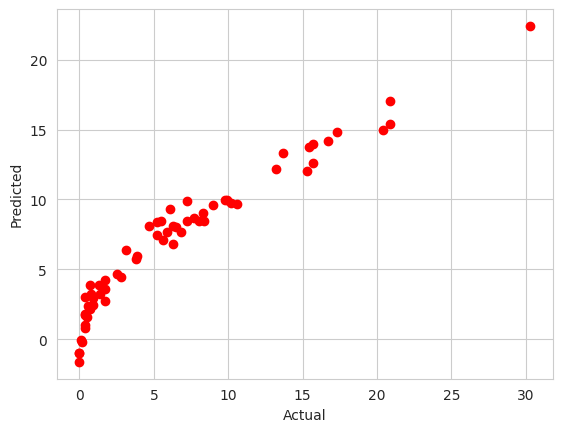

In [172]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

#intilazing the ridge regression model
elasticnet = ElasticNet()

# fitting train dataset into the model
elasticnet.fit(X_train_scale,y_train)

#predicting the value on scalled test set
y_pred = elasticnet.predict(X_test_scale)

# calculating the mse
mae = mean_absolute_error(y_test,y_pred)

# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('Mean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

# visualizing the prediction
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print("\nCoefficients:", elasticnet.coef_)

## ElasticNetCV
- The ElasticNetCV class provides a convenient way to apply ElasticNet regularization while automatically tuning the regularization parameters (
α and
𝑙
1
_
𝑟
𝑎
𝑡
𝑖
𝑜
) via cross-validation


alphas have looked for optimal one : [14.11706004 13.16561744 12.27829889 11.45078264 10.67903821  9.95930678
  9.28808283  8.66209714  8.07830078  7.53385034  7.02609405  6.55255882
  6.11093829  5.6990815   5.31498248  4.95677045  4.62270071  4.31114616
  4.02058933  3.74961507  3.49690356  3.26122397  3.04142839  2.83644629
  2.64527931  2.46699633  2.30072904  2.1456676   2.00105679  1.86619226
  1.74041714  1.62311885  1.51372607  1.411706    1.31656174  1.22782989
  1.14507826  1.06790382  0.99593068  0.92880828  0.86620971  0.80783008
  0.75338503  0.7026094   0.65525588  0.61109383  0.56990815  0.53149825
  0.49567705  0.46227007  0.43111462  0.40205893  0.37496151  0.34969036
  0.3261224   0.30414284  0.28364463  0.26452793  0.24669963  0.2300729
  0.21456676  0.20010568  0.18661923  0.17404171  0.16231189  0.15137261
  0.1411706   0.13165617  0.12278299  0.11450783  0.10679038  0.09959307
  0.09288083  0.08662097  0.08078301  0.0753385   0.07026094  0.06552559
  0.06110938  

Text(0, 0.5, 'Predicted')

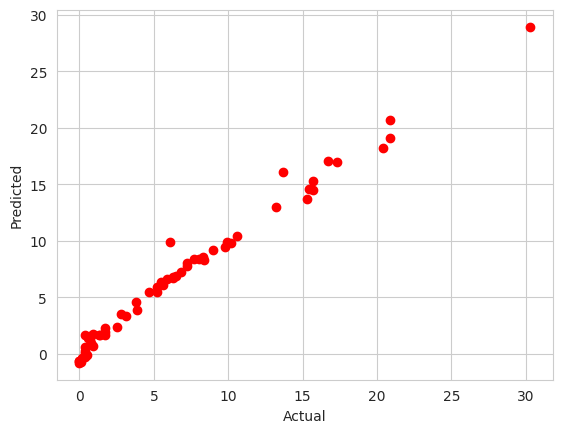

In [173]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score

elastic_cv = ElasticNetCV(cv=5,random_state=42)

elastic_cv .fit(X_train_scale,y_train)

y_pred = elastic_cv .predict(X_test_scale)

# No of alphas were checked before selecting best one
print("\nalphas have looked for optimal one :", elastic_cv.alphas_)
# Display the best alpha found by cross-validation
print("\nOptimal alpha:", elastic_cv.alpha_)
# Get the coefficients of the model with the best alpha
print("\nCoefficients:", elastic_cv.coef_)


# calculating the mse
mae = mean_absolute_error(y_test,y_pred)
# calculating the r2 score
r2 = r2_score(y_test,y_pred)

print('\nMean absolute error is :','%0.2f'%mae)
print('R^2 error is :','%0.2f'%r2)

plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [174]:
# parameter used in LassoCV
elastic_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}